
## NLP

### Q. Perform Trigram Analysis on 'reviews.text' column in the dataset Retails.xlsx.

In [1]:
## Installing the NLTK ( neural language tool kit )
!pip install nltk

In [2]:
## Installing the wordcloud
!pip install wordcloud

### Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
stop = stopwords.words('english')

### Importing the Dataset

In [5]:
retail_data = pd.read_excel(r'C:\Users\User-pc\Desktop\Retail.xlsx')
retail_data.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [8]:
# We need only reviews.text

retail_data = retail_data[['reviews.text']]
retail_data

,reviews.text
0,I initially had trouble deciding between the p...
1,Allow me to preface this with a little history...
2,I am enjoying it so far. Great for reading. Ha...
3,I bought one of the first Paperwhites and have...
4,I have to say upfront - I don't like coroporat...
...,...
1591,This is not the same remote that I got for my ...
1592,I have had to change the batteries in this rem...
1593,"Remote did not activate, nor did it connect to..."
1594,It does the job but is super over priced. I fe...


In [9]:
# Check 1st review
retail_data['reviews.text'][0]

"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cu

### Data preprocessing

In [10]:
retail_data['clean_text'] = retail_data['reviews.text'].str.lower().str.replace('[^a-z\']'," ")  

<ipython-input-10-8bc86f290617>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  retail_data['clean_text'] = retail_data['reviews.text'].str.lower().str.replace('[^a-z\']'," ")


In [11]:
# In the review above, we can see numbers, punctuations, etc which is need to be removed
# Cleaning the text now 
retail_data['clean_text'][0]

"i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing  the paperwhite is great  but if you have spending money  go for the voyage fortunately  i had friends who owned each  so i ended up buying the paperwhite on this basis  both models now have     ppi  so the    dollar jump turns out pricey the voyage's page press isn't always sensitive  and if you are fine with a specific setting  you don't need auto light adjustment  it's been a week and i am loving my paperwhite  no regrets  the touch screen is receptive and easy to use  and i keep the light at a specific setting regardless of the time of day   in any case  it's not hard to change the setting either  as you'll only be changing the light level at a certain time of day  not every now and then while reading  also glad that i went for the international shipping option with amazon  extra expense  but delivery was on time  with tracking  and i didnt need to worry about cu

In [12]:
## Seeing the dataframe
retail_data.head()

,reviews.text,clean_text
0,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...
1,Allow me to preface this with a little history...,allow me to preface this with a little history...
2,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading ha...
3,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...
4,I have to say upfront - I don't like coroporat...,i have to say upfront i don't like coroporat...


In [13]:
## Removing the Stopword & calling the list
stop_list = stopwords.words('english') 
stop_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
## Creating the user defined function to remove stopwords

def sw(x): 
    x = [word_list for word_list in x.split() if word_list not in stop_list]
    return " ".join(x)

In [15]:
retail_data.head()

,reviews.text,clean_text
0,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...
1,Allow me to preface this with a little history...,allow me to preface this with a little history...
2,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading ha...
3,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...
4,I have to say upfront - I don't like coroporat...,i have to say upfront i don't like coroporat...


In [16]:
# Applying  user defined function to clean text and name it as split text
retail_data['Split_text']=retail_data['clean_text'].apply(sw)

In [17]:
retail_data.head()

,reviews.text,clean_text,Split_text
0,I initially had trouble deciding between the p...,i initially had trouble deciding between the p...,initially trouble deciding paperwhite voyage r...
1,Allow me to preface this with a little history...,allow me to preface this with a little history...,allow preface little history casual reader own...
2,I am enjoying it so far. Great for reading. Ha...,i am enjoying it so far great for reading ha...,enjoying far great reading original fire since...
3,I bought one of the first Paperwhites and have...,i bought one of the first paperwhites and have...,bought one first paperwhites pleased constant ...
4,I have to say upfront - I don't like coroporat...,i have to say upfront i don't like coroporat...,say upfront like coroporate hermetically close...


## Simple Pre-Processing on 'Reviews'
Tokenization, Stop words removal -

Tokenization
In Python tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language.Here we are performing the word tokenization from NLTK Library

Stopwords
Stop words are words which are filtered out before or after processing of natural language data (text).[1] Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list

In [18]:
def tokenizeandstopwords(text):
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if not w in stop]
    joined_words = ( " ".join(meaningful_words))
    return joined_words

## WordCloud
A tag cloud (word cloud or wordle or weighted list in visual design) is a novelty visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color.[2] This format is useful for quickly perceiving the most prominent terms to determine its relative prominence. When used as website navigation aids, the terms are hyperlinked to items associated with the tag

In [19]:
# Defining the word Cloud function to generate the word cloud

def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

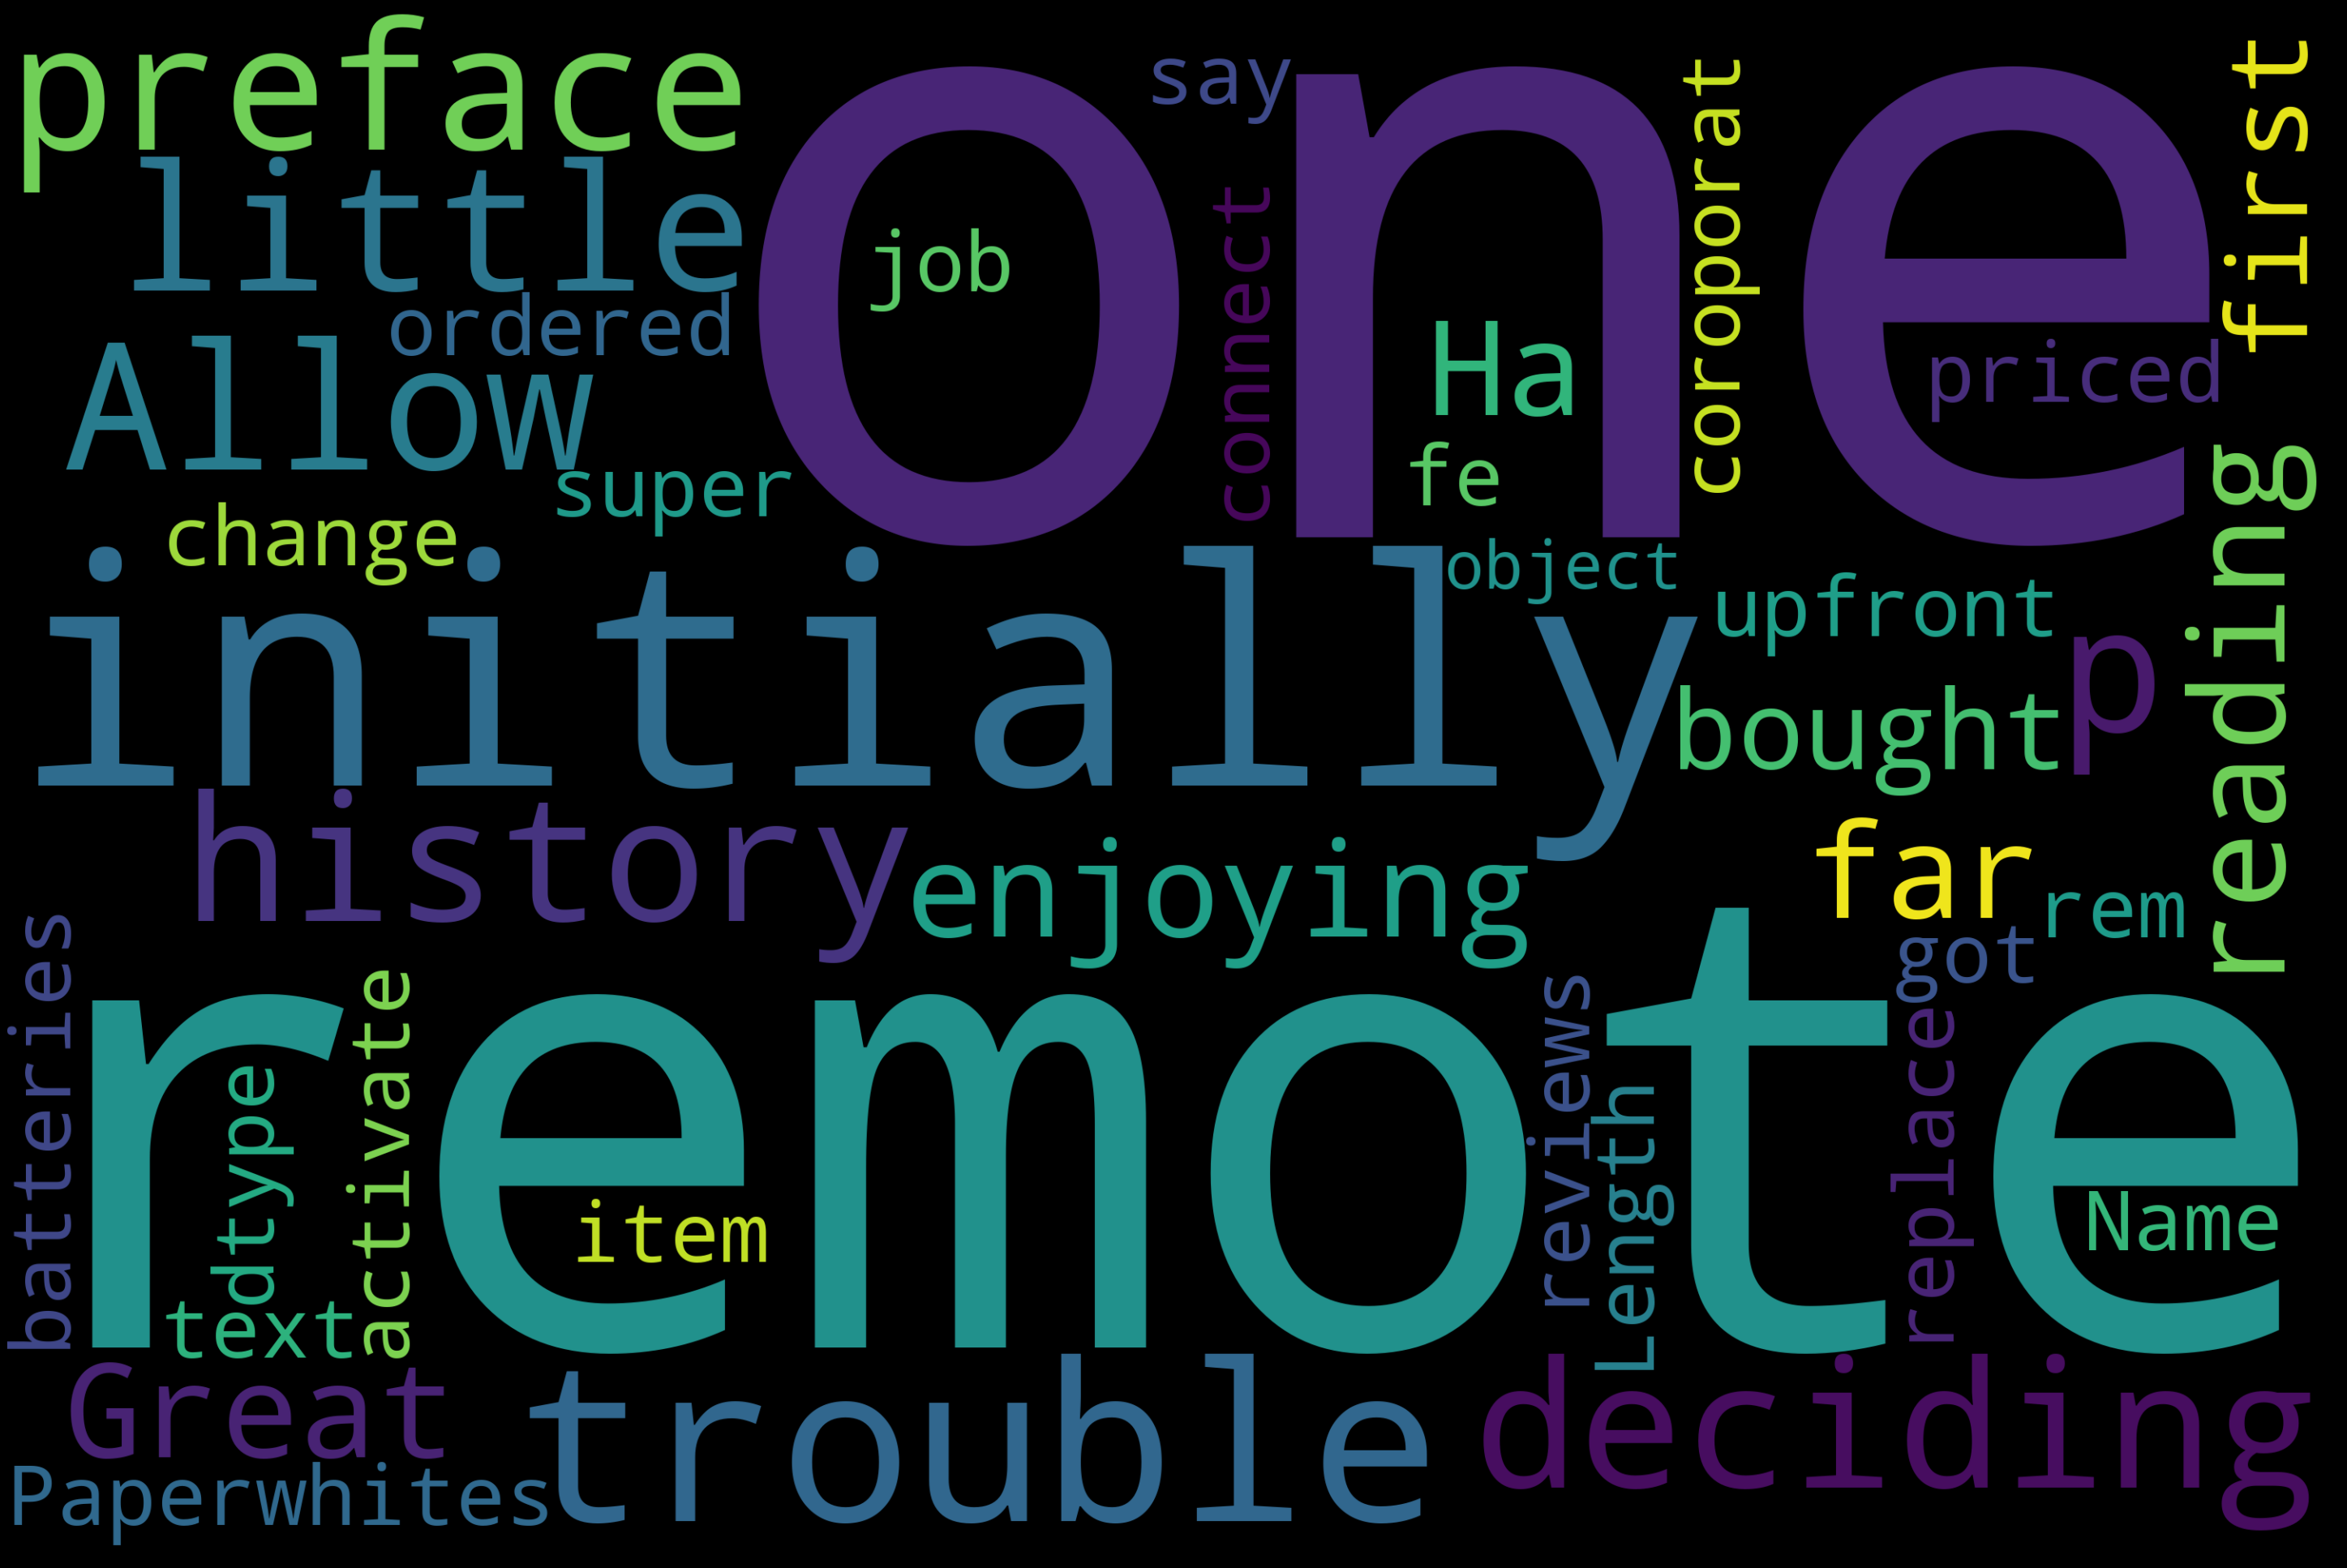

In [22]:
retail_data['reviews.text'] = retail_data['reviews.text'].values
generate_word_cloud(retail_data['reviews.text'])

In [23]:
retail_data['reviews.text'] = retail_data['reviews.text'].apply((lambda y:re.sub("http://\S+"," ", y)))
retail_data['reviews.text'] = retail_data['reviews.text'].apply((lambda x:re.sub("\@", " ",x.lower())))

In [24]:
def basic_clean(text):
    """A simple function to clean up the data. All the words that
    are not designated as a stop word is then lemmatized after
    encoding and basic regex parsing are performed."""
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\User-
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
retail_data = basic_clean(''.join(str(retail_data['reviews.text'].tolist())))

## N-Gram
In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles

## N-gram Analysis - Trigram

In [28]:
bigrams_series = (pd.Series(nltk.ngrams(retail_data, 3)).value_counts())[:20]

Text(0.5, 0, 'Number of Occurances')

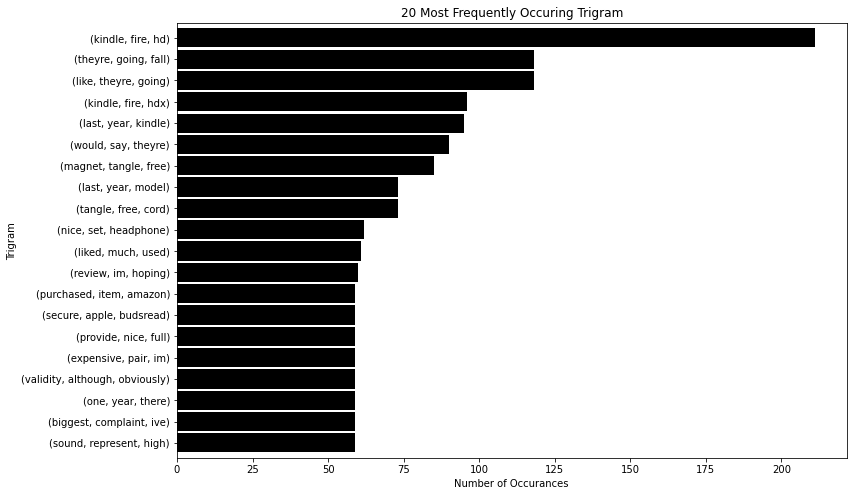

In [29]:
bigrams_series.sort_values().plot.barh(color='black', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigram')
plt.ylabel('Trigram')
plt.xlabel('Number of Occurances')

                        - - - - - - - - X X X X X X X X - - - - - - - -